__<center>Aviation Data Report</center>__<br>

The purpose of this project is to prepare a report giving a descriptive analysis of flight accidents from 1962 using Python.

Dataset: https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses

__Importing Libraries__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__Loading Dataset__

In [2]:
data = pd.read_csv('AviationData.csv', encoding='latin1', low_memory=False)

__Description of the data in the DataFrame__

In [3]:
data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


__Testing if the object has the right type of data__

In [4]:
data.head().style.hide()

Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,nan,nan,nan,nan,Fatal(2),Destroyed,nan,NC6404,Stinson,108-3,No,1.000000,Reciprocating,nan,nan,Personal,nan,2.000000,0.000000,0.000000,0.000000,UNK,Cruise,Probable Cause,nan
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,nan,nan,nan,nan,Fatal(4),Destroyed,nan,N5069P,Piper,PA24-180,No,1.000000,Reciprocating,nan,nan,Personal,nan,4.000000,0.000000,0.000000,0.000000,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,nan,nan,Fatal(3),Destroyed,nan,N5142R,Cessna,172M,No,1.000000,Reciprocating,nan,nan,Personal,nan,3.000000,nan,nan,nan,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,nan,nan,nan,nan,Fatal(2),Destroyed,nan,N1168J,Rockwell,112,No,1.000000,Reciprocating,nan,nan,Personal,nan,2.000000,0.000000,0.000000,0.000000,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,nan,nan,nan,nan,Fatal(1),Destroyed,nan,N15NY,Cessna,501,No,nan,nan,nan,nan,Personal,nan,1.000000,2.000000,nan,0.000000,VMC,Approach,Probable Cause,16-04-1980


__Data selection__

In [5]:
data2 = data[['Investigation.Type', 'Event.Date','Country','Aircraft.damage','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Broad.phase.of.flight']]
data2

,Investigation.Type,Event.Date,Country,Aircraft.damage,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Broad.phase.of.flight
0,Accident,1948-10-24,United States,Destroyed,2.0,0.0,0.0,0.0,Cruise
1,Accident,1962-07-19,United States,Destroyed,4.0,0.0,0.0,0.0,Unknown
2,Accident,1974-08-30,United States,Destroyed,3.0,NaN,NaN,NaN,Cruise
3,Accident,1977-06-19,United States,Destroyed,2.0,0.0,0.0,0.0,Cruise
4,Accident,1979-08-02,United States,Destroyed,1.0,2.0,NaN,0.0,Approach
...,...,...,...,...,...,...,...,...,...
88884,Accident,2022-12-26,United States,NaN,0.0,1.0,0.0,0.0,NaN
88885,Accident,2022-12-26,United States,NaN,0.0,0.0,0.0,0.0,NaN
88886,Accident,2022-12-26,United States,Substantial,0.0,0.0,0.0,1.0,NaN
88887,Accident,2022-12-26,United States,NaN,0.0,0.0,0.0,0.0,NaN


__Renaming column names__

In [6]:
data2 = data2.rename(columns={'Investigation.Type': 'Investigation Type', 'Event.Date': 'Event Date', 'Aircraft.damage': 'Aircraft damage', 'Total.Fatal.Injuries': 'Total Fatal Injuries', 'Total.Serious.Injuries': 'Total Serious Injuries', 'Total.Minor.Injuries': 'Total Minor Injuries', 'Total.Uninjured': 'Total Uninjured', 'Broad.phase.of.flight': 'Broad phase of flight'})

__Missing data - identification__

In [7]:
data2.isnull().sum()

Investigation Type            0
Event Date                    0
Country                     226
Aircraft damage            3194
Total Fatal Injuries      11401
Total Serious Injuries    12510
Total Minor Injuries      11933
Total Uninjured            5912
Broad phase of flight     27165
dtype: int64

__Filling empty cells with numerical data by inserting 0__

In [8]:
data2 = data2.fillna({'Total Fatal Injuries': 0, 'Total Serious Injuries': 0, 'Total Minor Injuries': 0, 'Total Uninjured': 0 })
data2

,Investigation Type,Event Date,Country,Aircraft damage,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Broad phase of flight
0,Accident,1948-10-24,United States,Destroyed,2.0,0.0,0.0,0.0,Cruise
1,Accident,1962-07-19,United States,Destroyed,4.0,0.0,0.0,0.0,Unknown
2,Accident,1974-08-30,United States,Destroyed,3.0,0.0,0.0,0.0,Cruise
3,Accident,1977-06-19,United States,Destroyed,2.0,0.0,0.0,0.0,Cruise
4,Accident,1979-08-02,United States,Destroyed,1.0,2.0,0.0,0.0,Approach
...,...,...,...,...,...,...,...,...,...
88884,Accident,2022-12-26,United States,NaN,0.0,1.0,0.0,0.0,NaN
88885,Accident,2022-12-26,United States,NaN,0.0,0.0,0.0,0.0,NaN
88886,Accident,2022-12-26,United States,Substantial,0.0,0.0,0.0,1.0,NaN
88887,Accident,2022-12-26,United States,NaN,0.0,0.0,0.0,0.0,NaN


__Filling empty cells with textual data by inserting "Unknown"__

In [9]:
data2 = data2.fillna('Unknown')

__Missing data - current status__

In [10]:
data2.isnull().sum()

Investigation Type        0
Event Date                0
Country                   0
Aircraft damage           0
Total Fatal Injuries      0
Total Serious Injuries    0
Total Minor Injuries      0
Total Uninjured           0
Broad phase of flight     0
dtype: int64

__Sorting by highest number of survivors (5 cases)__

In [11]:
data2.sort_values(by='Total Uninjured', ascending=False).head(5)[['Investigation Type', 'Event Date', 'Country', 'Total Uninjured']]

,Investigation Type,Event Date,Country,Total Uninjured
46293,Accident,1999-06-06,United States,699.0
46284,Accident,1999-06-06,United States,699.0
4150,Incident,1983-03-18,United States,588.0
4149,Incident,1983-03-18,United States,588.0
69813,Accident,2011-04-12,United States,576.0


__Sorting by highest number of non-survivors (5 cases)__

In [12]:
data2.sort_values(by='Total Fatal Injuries', ascending=False).head(5)[['Investigation Type', 'Event Date', 'Country', 'Total Fatal Injuries']]

,Investigation Type,Event Date,Country,Total Fatal Injuries
40882,Accident,1996-11-12,India,349.0
40881,Accident,1996-11-12,India,349.0
75437,Accident,2014-07-17,Ukraine,295.0
22082,Accident,1988-12-21,United Kingdom,270.0
51769,Accident,2001-11-12,United States,265.0


__Grouping by Total Uninjured - Country__

In [13]:
data2.groupby('Country')['Total Uninjured'].sum().sort_values(ascending=False)

Country
United States      332334.0
Japan                7890.0
United Kingdom       6483.0
ATLANTIC OCEAN       4682.0
Indonesia            4411.0
                     ...   
Cote D'ivoire           0.0
Corsica                 0.0
Solomon Islands         0.0
Chad                    0.0
Liberia                 0.0
Name: Total Uninjured, Length: 219, dtype: float64

__Grouping by Total Fatal Injuries - Country__

In [14]:
data2.groupby('Country')['Total Fatal Injuries'].sum().sort_values(ascending=False)

Country
United States                    30190.0
Brazil                            1243.0
India                              970.0
Indonesia                          949.0
Canada                             946.0
                                  ...   
Cyprus                               0.0
AY                                   0.0
St Kitts And Nevis                   0.0
St Vincent And The Grenadines        0.0
Sierra Leone                         0.0
Name: Total Fatal Injuries, Length: 219, dtype: float64

In [15]:
data2.describe()

,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured
count,88889.000000,88889.000000,88889.000000,88889.000000
mean,0.564761,0.240491,0.309127,4.971245
std,5.126649,1.434614,2.083715,27.002011
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000
max,349.000000,161.000000,380.000000,699.000000


__Outliers__

array([[<Axes: title={'center': 'Total Fatal Injuries'}>,
        <Axes: title={'center': 'Total Serious Injuries'}>],
       [<Axes: title={'center': 'Total Minor Injuries'}>,
        <Axes: title={'center': 'Total Uninjured'}>]], dtype=object)

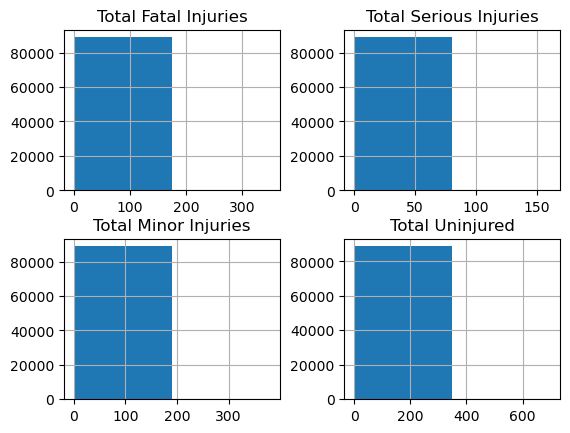

In [16]:
data2[['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries',
       'Total Uninjured']].hist(bins=2)

C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


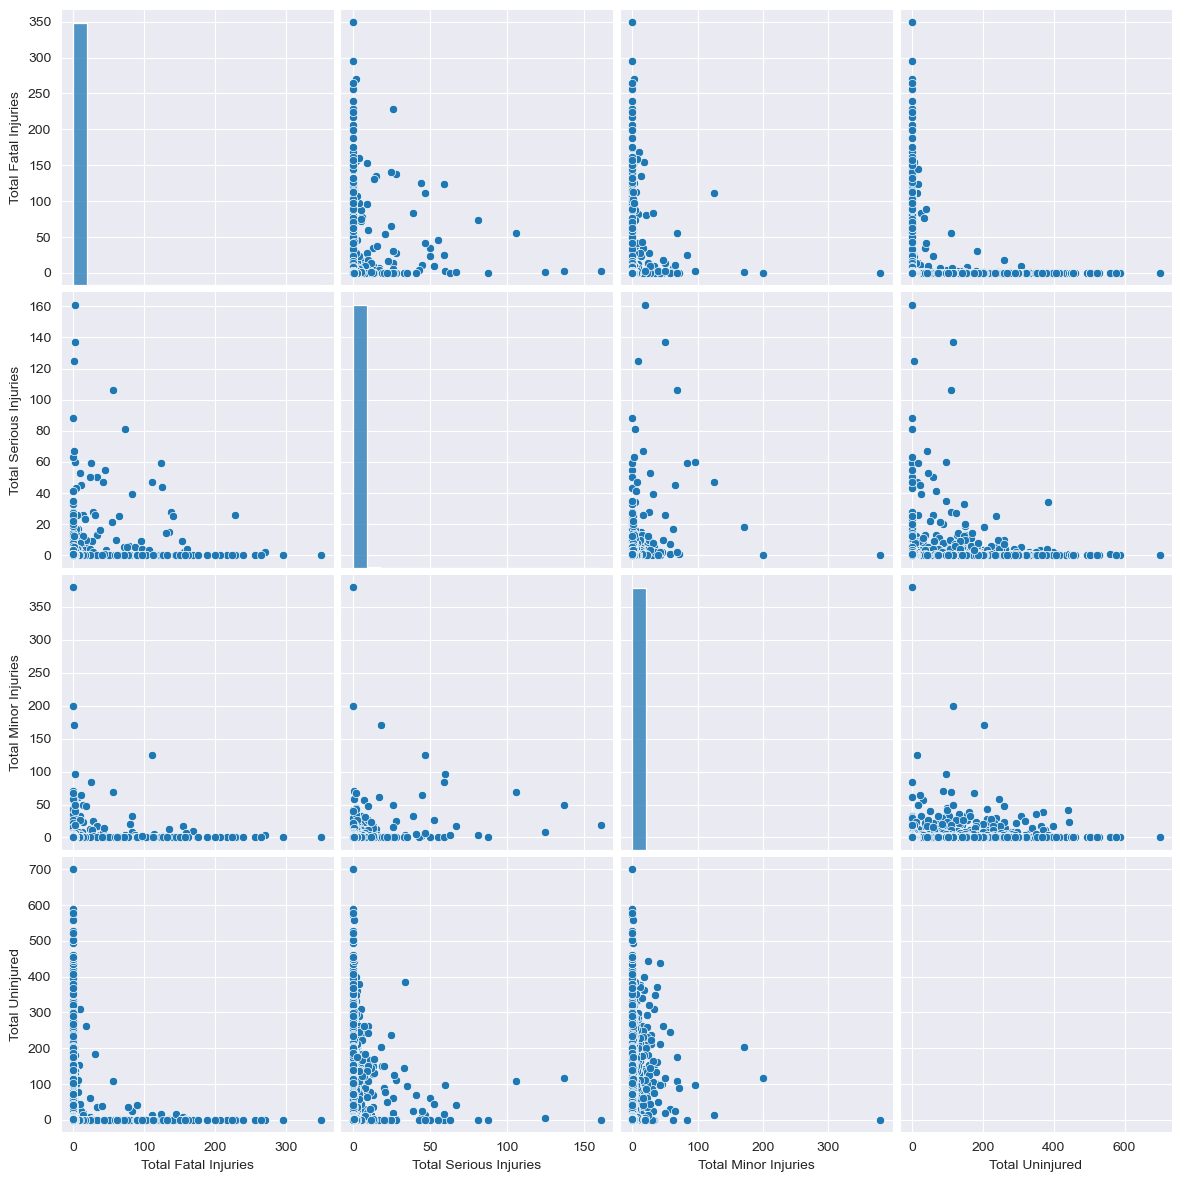

In [17]:
sns.set_style('darkgrid')
sns.pairplot(data2[['Total Fatal Injuries', 'Total Serious Injuries',
       'Total Minor Injuries', 'Total Uninjured']], height = 3)
plt.show()

__Accidents vs Incidents - comparing by Pie Chart__

In [18]:
data2.columns

Index(['Investigation Type', 'Event Date', 'Country', 'Aircraft damage',
       'Total Fatal Injuries', 'Total Serious Injuries',
       'Total Minor Injuries', 'Total Uninjured', 'Broad phase of flight'],
      dtype='object')

In [19]:
Accident = data2.loc[data2['Investigation Type'] == 'Accident'].count()[0]
Accident

85015

In [20]:
Incident = data2.loc[data2['Investigation Type'] == 'Incident'].count()[0]
Incident

3874

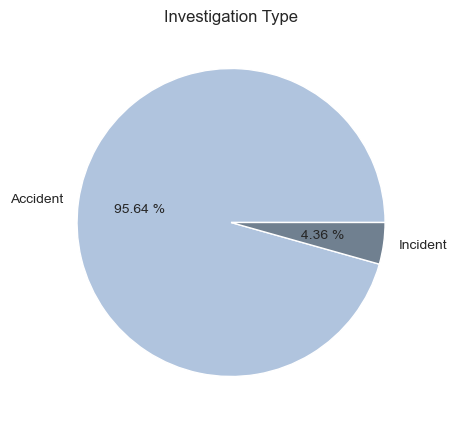

In [21]:
plt.figure(figsize = (8,5))

labels = ['Accident', 'Incident']
colors = ['lightsteelblue', 'slategrey']

plt.pie([Accident, Incident], labels = labels, colors = colors, autopct = '%.2f %%')

plt.title('Investigation Type')

plt.show()

__Aircraft damage__

In [22]:
Destroyed = data2.loc[data2['Aircraft damage'] == 'Destroyed'].count()[0]
Destroyed

18623

In [23]:
Minor = data2.loc[data2['Aircraft damage'] == 'Minor'].count()[0]
Minor

2805

In [24]:
Substantial = data2.loc[data2['Aircraft damage'] == 'Substantial'].count()[0]
Substantial

64148

In [25]:
Unknown = data2.loc[data2['Aircraft damage'] == 'Unknown'].count()[0]
Unknown

3313

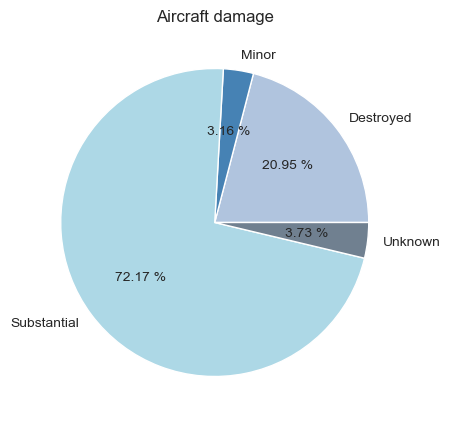

In [26]:
plt.figure(figsize = (8,5))

labels = ['Destroyed', 'Minor', 'Substantial', 'Unknown']
colors = ['lightsteelblue', 'steelblue', 'lightblue', 'slategrey']

plt.pie([Destroyed, Minor, Substantial, Unknown], labels = labels, colors = colors, autopct = '%.2f %%')

plt.title('Aircraft damage')

plt.show()

The most common damage was substantial and the rarest was minor

__Injuries by broad phase of flight__

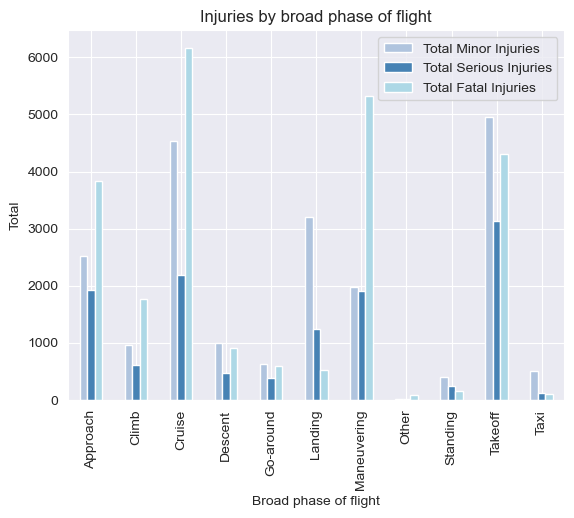

In [31]:
data2=data2[data2['Broad phase of flight'] !='Unknown']

data2_grouped = data2[['Total Minor Injuries', 'Total Serious Injuries', 'Total Fatal Injuries']].groupby(data2['Broad phase of flight']).sum()

data2_grouped.plot(kind='bar', color=['lightsteelblue', 'steelblue', 'lightblue', 'slategrey'])

plt.title('Injuries by broad phase of flight')
plt.xlabel('Broad phase of flight')
plt.ylabel('Total')
plt.show()
                  

Fatal injuries - the highest number of fatal injuries was during the cruise phase<br>
Serious injuries - the highest number of serious injuries was during the takeoff phase<br>
Minor injuries - the highest number of minor injuries was during the takeoff phase

In [28]:
data2['Year'] = pd.DatetimeIndex(data2['Event Date']).year

In [29]:
data2.head()

,Investigation Type,Event Date,Country,Aircraft damage,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Broad phase of flight,Year
0,Accident,1948-10-24,United States,Destroyed,2.0,0.0,0.0,0.0,Cruise,1948
2,Accident,1974-08-30,United States,Destroyed,3.0,0.0,0.0,0.0,Cruise,1974
3,Accident,1977-06-19,United States,Destroyed,2.0,0.0,0.0,0.0,Cruise,1977
4,Accident,1979-08-02,United States,Destroyed,1.0,2.0,0.0,0.0,Approach,1979
5,Accident,1979-09-17,United States,Substantial,0.0,0.0,1.0,44.0,Climb,1979


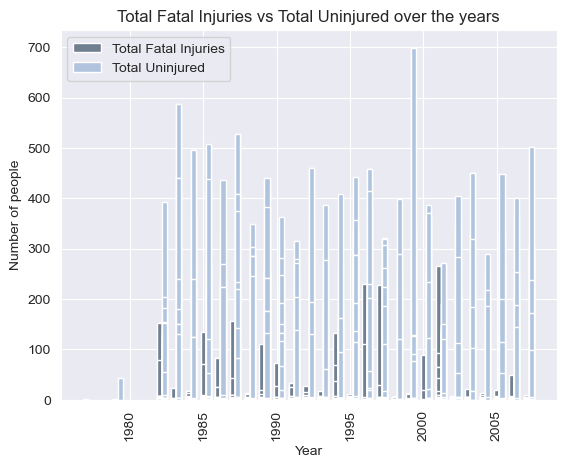

In [30]:
data2 = data2[(data2['Year']< 1945) | (data2['Year']> 1975)]

data2.sort_values('Year', inplace = True)

bar_width = 0.35
index = data2['Year']

fig, ax = plt.subplots()

bar1 = ax.bar(index, data2['Total Fatal Injuries'], bar_width, label='Total Fatal Injuries', color='slategrey')
bar2 = ax.bar(index + bar_width, data2['Total Uninjured'], bar_width, label='Total Uninjured', color='lightsteelblue')

ax.set_xlabel('Year')
ax.set_ylabel('Number of people')
ax.set_title('Total Fatal Injuries vs Total Uninjured over the years')
ax.legend()

plt.xticks(rotation=90)
plt.show()

The highest number of total uninjured was in 1999 and the highest number of total fatal injuries was in 2001